In [1]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
data_dir = 'D:/Sai Jayakar/leaf_new/DatasetOfLeavs/Healthy_and_diseased/Leaf_dataset_Augmentation/Dataset_augmented'
categories = os.listdir(data_dir)

data = []
labels = []

img_size = 128

for category in categories:
    path = os.path.join(data_dir, category)
    class_num = categories.index(category)
    
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            resized_array = cv2.resize(img_array, (img_size, img_size))
            data.append(resized_array)
            labels.append(class_num)
        except Exception as e:
            pass

data = np.array(data)
labels = np.array(labels)


In [3]:
data = data / 255.0

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)


MemoryError: Unable to allocate 13.8 GiB for an array with shape (37570, 128, 128, 3) and data type float64

# approach 2

In [1]:
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [2]:
data_dir = 'D:/Sai Jayakar/leaf_new/DatasetOfLeavs/Healthy_and_diseased/Leaf_dataset_Augmentation/Dataset_augmented'
img_size = 128
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 24878 images belonging to 26 classes.
Found 6212 images belonging to 26 classes.


In [16]:
class_indices = train_generator.class_indices
categories = list(class_indices.keys())
print("Class names used in training:", categories)

Class names used in training: ['Betel___Bacterial', 'Betel___Dried', 'Betel___Fungal_Brown', 'Betel___healthy', 'Jamun___Bacterial_Spot', 'Jamun___Dry', 'Jamun___Healthy', 'Mango___Anthracnose', 'Mango___Bacterial_Canker', 'Mango___Die_Back', 'Mango___Sooty_Mould', 'Mango___healthy', 'Money___Bacterial', 'Money___healthy', 'Papaya___Leaf_Curl', 'Papaya___Mite', 'Papaya___Ring_Spot', 'Papaya___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


# model creation

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=10
)


Epoch 1/10
777/777 [==============================] - 1063s 1s/step - loss: 1.3208 - accuracy: 0.5854 - val_loss: 0.5402 - val_accuracy: 0.8141
Epoch 2/10
777/777 [==============================] - 370s 476ms/step - loss: 0.6377 - accuracy: 0.7756 - val_loss: 0.3654 - val_accuracy: 0.8727
Epoch 3/10
777/777 [==============================] - 373s 480ms/step - loss: 0.4801 - accuracy: 0.8288 - val_loss: 0.3327 - val_accuracy: 0.8847
Epoch 4/10
777/777 [==============================] - 354s 455ms/step - loss: 0.3963 - accuracy: 0.8562 - val_loss: 0.3020 - val_accuracy: 0.8893
Epoch 5/10
777/777 [==============================] - 353s 454ms/step - loss: 0.3493 - accuracy: 0.8760 - val_loss: 0.3052 - val_accuracy: 0.8926
Epoch 6/10
777/777 [==============================] - 350s 450ms/step - loss: 0.3036 - accuracy: 0.8889 - val_loss: 0.5565 - val_accuracy: 0.8193
Epoch 7/10
777/777 [==============================] - 373s 480ms/step - loss: 0.2721 - accuracy: 0.9015 - val_loss: 0.2322 - v

In [5]:
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


194/194 [==============================] - 31s 158ms/step - loss: 0.2169 - accuracy: 0.9333
Validation Accuracy: 93.33%


In [6]:
model.save('leaf_disease_model.h5')


# prediction

In [7]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [15]:
model = load_model('leaf_disease_model.h5')

def prepare_image(filepath, img_size=128):
    img_array = cv2.imread(filepath)
    resized_array = cv2.resize(img_array, (img_size, img_size))
    normalized_array = resized_array / 255.0
    return np.expand_dims(normalized_array, axis=0)

new_image_path = "D:/Sai Jayakar/leaf_new/DatasetOfLeavs/Healthy_and_diseased/Leaf_dataset_Augmentation/Dataset_augmented/Money___Bacterial/image (2).jpg"
prepared_image = prepare_image(new_image_path)
prediction = model.predict(prepared_image)
print("Prediction:", model.class_indices[np.argmax(prediction)])


1/1 [==============================] - 0s 79ms/step


AttributeError: 'Sequential' object has no attribute 'class_indices'

In [20]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import os

# Load the saved model
model = load_model('leaf_disease_model.h5')

# Define the categories based on your dataset
# Ensure these categories match the ones used during training
categories = ['Betel___Bacterial', 'Betel___Dried', 'Betel___Fungal_Brown', 'Betel___healthy', 'Jamun___Bacterial_Spot', 'Jamun___Dry', 'Jamun___Healthy', 'Mango___Anthracnose', 'Mango___Bacterial_Canker', 'Mango___Die_Back', 'Mango___Sooty_Mould', 'Mango___healthy', 'Money___Bacterial', 'Money___healthy', 'Papaya___Leaf_Curl', 'Papaya___Mite', 'Papaya___Ring_Spot', 'Papaya___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']  # Replace with your actual class names

def prepare_image(filepath, img_size=128):
    # Read the image from the file
    img_array = cv2.imread(filepath)
    # Resize the image to the required size
    resized_array = cv2.resize(img_array, (img_size, img_size))
    # Normalize the image
    normalized_array = resized_array / 255.0
    # Expand dimensions to fit model input
    return np.expand_dims(normalized_array, axis=0)

def predict_disease(image_path, model, categories, img_size=128):
    # Prepare the image
    prepared_image = prepare_image(image_path, img_size)
    
    # Predict the label
    prediction = model.predict(prepared_image)
    predicted_class_index = np.argmax(prediction)
    label = categories[predicted_class_index]
    
    return label, prediction

# Test the function with an image path
image_path = "D:\Sai Jayakar\leaf_new\DatasetOfLeavs\Healthy_and_diseased\Leaf_dataset_Augmentation\Dataset_augmented\Money___healthy\image (1).jpg"
predicted_label, prediction = predict_disease(image_path, model, categories)
print("Prediction:", predicted_label)
print("Prediction Confidence:", prediction)


1/1 [==============================] - 0s 78ms/step
Prediction: Betel___Bacterial
Prediction Confidence: [[4.95243341e-01 2.61303736e-04 2.23608431e-03 1.39033506e-02
  7.98441313e-11 2.24360850e-08 8.90185980e-10 1.62595143e-07
  1.04634221e-08 8.50983088e-06 1.74587491e-08 1.78762143e-08
  1.98651705e-05 1.05446954e-04 1.85798243e-07 2.88502561e-05
  3.47969467e-06 2.67231848e-10 5.68247233e-05 1.46437772e-02
  6.52827730e-05 3.93299473e-04 2.94652551e-01 9.75321457e-02
  6.86660036e-02 1.21795340e-02]]


# Approach 3

In [21]:
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt


In [22]:
data_dir = 'D:/Sai Jayakar/leaf_new/DatasetOfLeavs/Healthy_and_diseased/Leaf_dataset_Augmentation/Dataset_augmented'
img_size = 128
batch_size = 32

In [23]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [24]:
# Training and validation data generators
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Extracting class indices and categories
class_indices = train_generator.class_indices
categories = list(class_indices.keys())
print("Class names used in training:", categories)

Found 24878 images belonging to 26 classes.
Found 6212 images belonging to 26 classes.
Class names used in training: ['Betel___Bacterial', 'Betel___Dried', 'Betel___Fungal_Brown', 'Betel___healthy', 'Jamun___Bacterial_Spot', 'Jamun___Dry', 'Jamun___Healthy', 'Mango___Anthracnose', 'Mango___Bacterial_Canker', 'Mango___Die_Back', 'Mango___Sooty_Mould', 'Mango___healthy', 'Money___Bacterial', 'Money___healthy', 'Papaya___Leaf_Curl', 'Papaya___Mite', 'Papaya___Ring_Spot', 'Papaya___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(train_generator.num_classes, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=20  # Increase epochs for better results
)

Epoch 1/20
777/777 [==============================] - 2942s 4s/step - loss: 1.1046 - accuracy: 0.6589 - val_loss: 0.9716 - val_accuracy: 0.6756
Epoch 2/20
777/777 [==============================] - 781s 1s/step - loss: 0.5786 - accuracy: 0.8014 - val_loss: 1.6155 - val_accuracy: 0.6026
Epoch 3/20
777/777 [==============================] - 670s 863ms/step - loss: 0.4481 - accuracy: 0.8447 - val_loss: 1.8111 - val_accuracy: 0.5981
Epoch 4/20
777/777 [==============================] - 617s 794ms/step - loss: 0.3550 - accuracy: 0.8786 - val_loss: 1.2830 - val_accuracy: 0.6277
Epoch 5/20
777/777 [==============================] - 621s 799ms/step - loss: 0.3171 - accuracy: 0.8892 - val_loss: 0.4289 - val_accuracy: 0.8402
Epoch 6/20
777/777 [==============================] - 634s 816ms/step - loss: 0.2617 - accuracy: 0.9102 - val_loss: 0.4416 - val_accuracy: 0.8687
Epoch 7/20
777/777 [==============================] - 639s 822ms/step - loss: 0.2232 - accuracy: 0.9239 - val_loss: 4.3592 - val_

In [28]:
# Evaluating the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


194/194 [==============================] - 64s 328ms/step - loss: 0.1263 - accuracy: 0.9591
Validation Accuracy: 95.91%


In [29]:
# Saving the model
model.save('leaf_disease_model1.h5')

# prediction

Class names used in training: ['Betel___Bacterial', 'Betel___Dried', 'Betel___Fungal_Brown', 'Betel___healthy', 'Jamun___Bacterial_Spot', 'Jamun___Dry', 'Jamun___Healthy', 'Mango___Anthracnose', 'Mango___Bacterial_Canker', 'Mango___Die_Back', 'Mango___Sooty_Mould', 'Mango___healthy', 'Money___Bacterial', 'Money___healthy', 'Papaya___Leaf_Curl', 'Papaya___Mite', 'Papaya___Ring_Spot', 'Papaya___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Predicted class: Betel___healthy


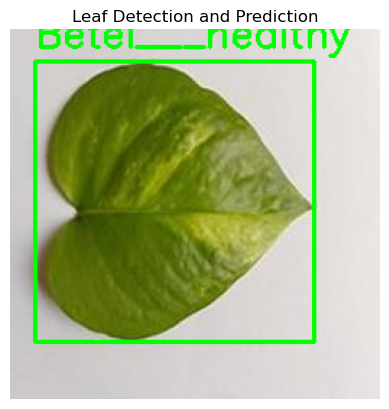

In [26]:
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import os
import matplotlib.pyplot as plt

# Load the saved model
model = load_model('leaf_disease_model1.h5')

# Define the categories based on your dataset
data_dir = 'D:/Sai Jayakar/leaf_new/DatasetOfLeavs/Healthy_and_diseased/Leaf_dataset_Augmentation/Dataset_augmented'
categories = sorted(os.listdir(data_dir))
print("Class names used in training:", categories)

def prepare_image(image, img_size=128):
    # Resize the image to the required size
    resized_array = cv2.resize(image, (img_size, img_size))
    # Normalize the image
    normalized_array = resized_array / 255.0
    # Expand dimensions to fit model input
    return np.expand_dims(normalized_array, axis=0)

def predict_disease(image, model, categories, img_size=128):
    # Prepare the image
    prepared_image = prepare_image(image, img_size)
    
    # Predict the label
    prediction = model.predict(prepared_image)
    predicted_class_index = np.argmax(prediction)
    label = categories[predicted_class_index]
    
    return label, prediction

def detect_and_predict(image_path, model, categories):
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Error: Unable to load image at path: {image_path}")
        return
    
    original_image = image.copy()
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply GaussianBlur to reduce noise and improve contour detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Perform edge detection
    edged = cv2.Canny(blurred, 50, 150)
    
    # Find contours in the edged image
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # If there are no contours, return
    if not contours:
        print("No contours found")
        return
    
    # Find the largest contour
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box for the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    
    # Extract the ROI (Region of Interest) from the image
    roi = image[y:y+h, x:x+w]
    
    # Predict the disease in the ROI
    label, prediction = predict_disease(roi, model, categories)
    print(f"Predicted class: {label}")

    # Draw the bounding box and the predicted label on the image
    cv2.rectangle(original_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(original_image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the result
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Leaf Detection and Prediction")
    plt.axis('off')
    plt.show()

# Test the function with an image path
image_path ="D:\Sai Jayakar\leaf_new\DatasetOfLeavs\Healthy_and_diseased\Leaf_dataset_Augmentation\Dataset_augmented\Money___healthy\image (354).jpg"
detect_and_predict(image_path, model, categories)
